# Notebook analyzing a data set of the winners of the Nobel Prize 

Notebook taken from online course

## Importing Statements

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv("nobel_prize_data.csv")

## Data exploration

### Shape of the data

In [3]:
rows, cols = data.shape
print(f"The data has {rows} rows and {cols} columns.")

The data has 962 rows and 16 columns.


### Columns name and data type

In [4]:
print(f"The coloumns are:")
for item in data.columns:
    print(item)

The coloumns are:
year
category
prize
motivation
prize_share
laureate_type
full_name
birth_date
birth_city
birth_country
birth_country_current
sex
organization_name
organization_city
organization_country
ISO


In [5]:
print("The type of data within the columns are:")
print(data.dtypes)

The type of data within the columns are:
year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object


### First and last years

In [6]:
data.sort_values(["year"])

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Harvey J. Alter,1935-09-12,"New York, NY",United States of America,United States of America,Male,National Institutes of Health,"Bethesda, MD",United States of America,USA
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
950,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Emmanuelle Charpentier,1968-12-11,Juvisy-sur-Orge,France,France,Female,Max-Planck-Institut,Berlin,Germany,FRA
951,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Jennifer A. Doudna,1964-02-19,"Washington, DC",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA


In [7]:
print(f"The first year is: {data.sort_values(['year'])['year'][0]}")
print(f"The last year is: {data.sort_values(['year'])['year'].iloc[-1]}")

The first year is: 1901
The last year is: 2020


## Cleaning the data

### Finding duplicates

In [8]:
if data[data.duplicated()].empty:
    print("No duplicates found")
else:
    print("Duplicated are: ")
    data[data.duplicated()]

No duplicates found


### Finding NaN values

In [9]:
data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

The information on organizations tend to have a lot of missing values! Maybe the Nobel prize did not work for an organization?

### Converting birthday to date_time object and prize_share to percentage

In [10]:
data["birth_date"] = pd.to_datetime(data["birth_date"])

In [11]:
data.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
dtype: object

In [12]:
data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [13]:
a = pd.DataFrame([int(item[0]) for item in data["prize_share"]])
b = pd.DataFrame([int(item[2]) for item in data["prize_share"]])
data["prize_pct"] = a/b
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

## Men vs Women

Let us check the men vs women winners per year!
First, year to number convertion.

In [14]:
data["year"] = data["year"].astype(int)

Next, plotting a pie chart! 

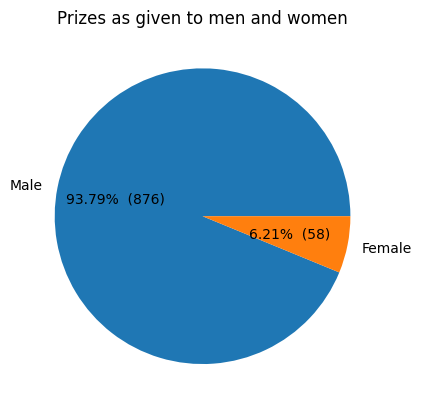

In [15]:
gender = data.sex.value_counts()
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(x=gender.values,
       labels=gender.index,
        autopct=make_autopct(gender.values)
       )
plt.title("Prizes as given to men and women")
plt.show()

How many men vs women has won the prize pver the years?

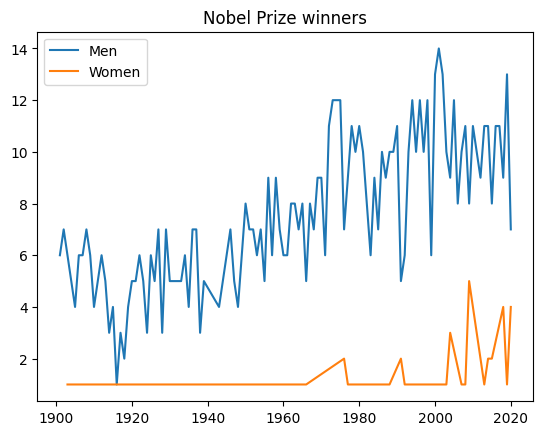

In [16]:
male_time = data[data['sex']=='Male'].groupby(['year']).count()
woman_time = data[data['sex']=='Female'].groupby(['year']).count()
plt.plot(male_time['sex'], label='Men')
plt.plot(woman_time['sex'], label='Women')
plt.legend()
plt.title('Nobel Prize winners')
plt.show()

There has been always a woman winning the prize. Only at about 1970 there has been moew than 1. 

### Three first female laureates

In [17]:
data[data['sex']=='Female'].sort_values(['year']).head(3)[['full_name', 'prize', 'birth_country', 'organization_name']]

,full_name,prize,birth_country,organization_name
18,"Marie Curie, née Sklodowska",The Nobel Prize in Physics 1903,Russian Empire (Poland),NaN
29,"Baroness Bertha Sophie Felicita von Suttner, n...",The Nobel Peace Prize 1905,Austrian Empire (Czech Republic),NaN
51,Selma Ottilia Lovisa Lagerlöf,The Nobel Prize in Literature 1909,Sweden,NaN


### Those who won the Nobel Prize more than once

In [18]:
data[data['full_name'].duplicated(keep=False)].sort_values(['full_name'])[['prize', 'full_name', 'organization_name']]

,prize,full_name,organization_name
89,The Nobel Peace Prize 1917,Comité international de la Croix Rouge (Intern...,NaN
215,The Nobel Peace Prize 1944,Comité international de la Croix Rouge (Intern...,NaN
348,The Nobel Peace Prize 1963,Comité international de la Croix Rouge (Intern...,NaN
306,The Nobel Prize in Chemistry 1958,Frederick Sanger,University of Cambridge
505,The Nobel Prize in Chemistry 1980,Frederick Sanger,MRC Laboratory of Molecular Biology
297,The Nobel Prize in Physics 1956,John Bardeen,University of Illinois
424,The Nobel Prize in Physics 1972,John Bardeen,University of Illinois
278,The Nobel Prize in Chemistry 1954,Linus Carl Pauling,California Institute of Technology (Caltech)
340,The Nobel Peace Prize 1962,Linus Carl Pauling,California Institute of Technology (Caltech)
18,The Nobel Prize in Physics 1903,"Marie Curie, née Sklodowska",NaN


Several persons, several years, and several organizations! 

### Category of prizes

In [19]:
categories = data.category.unique()
print(f'The categories of the Nobel Prize are:')
for cat in categories: 
    print(f'- {cat}.')


The categories of the Nobel Prize are:
- Chemistry.
- Literature.
- Medicine.
- Peace.
- Physics.
- Economics.


Number of Nobel Prize per category. 

In [20]:
prize_per_cat = data.category.value_counts()

fig = px.bar(x=prize_per_cat.index, 
             y=prize_per_cat.values,
            )

fig.update_layout(xaxis_title='Nobel Prize Category', 
                    yaxis_title='Number of Prizes')
fig.show(renderer='iframe')

Medicine is the cateogry with most prizes, and economics the one with less! 

### Economics first prize

In [21]:
data[data['category']=='Economics'][['year', 'category', 'full_name']].sort_values('year').head(3)

,year,category,full_name
393,1969,Economics,Jan Tinbergen
394,1969,Economics,Ragnar Frisch
402,1970,Economics,Paul A. Samuelson


First prize of economics awarded to Jan Tinbergen in 1969. 

### Number of Prizes per category and gender

In [22]:
# data_per_gender = data.groupby(['category','sex'], as_index=False).agg({'prize': pd.Series.count})
# data_per_gender
data_per_gender = data.groupby(['category','sex'], as_index=False).count()
data_per_gender
fig = px.bar(data_per_gender,
             x='category',
             y='prize',
             color='sex')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

## Trends over time

In [23]:
data_trend = data.groupby('year', as_index=False).count()
data_trend['rolling'] = data_trend.prize.rolling(5).mean()
data_trend
fig = px.line(data_trend,
       x='year',
       y=['prize', 'rolling'],
        title='Number of Nobel prizes vs Year')
fig.update_traces(line_width=2)
fig.update_layout(yaxis_title="prize number and rolling mean (5)")
fig.show(renderer='iframe')

# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

Checking the prize share over time

In [24]:
prize_share_val = []
for share in data.prize_share:
    fraction = share.split("/")
    fraction = float(fraction[0]) / float(fraction[1])
    prize_share_val.append(fraction)
    #print(fraction)
data['prize_share_val'] = prize_share_val


In [25]:
#data_trend['prize_share_val'] = data.groupby('year').agg({'prize_share_val': pd.Series.mean})
calculation = data.groupby('year').agg({'prize_share_val': pd.Series.mean})
data_trend['prize_share_val'] = calculation.values


In [26]:
from plotly.subplots import make_subplots
 
# use specs parameter in make_subplots function
# to create secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=data_trend.year, y=data_trend.prize, mode='lines', name="prize"), secondary_y=False)
fig.add_trace(go.Scatter(x=data_trend.year, y=data_trend.prize_share_val, mode='lines', name="share"), secondary_y=True)
fig.update_layout(yaxis_title="prize and share", xaxis_title="year")
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

## Prizes per country

There are two columns with birth_country indormation. What is the difference? The following cell shows the countries of the column "birth_country". Interestingly, some sountries do not exist any longer. Hence, at the time of birth of the person who won the prize, the countries were different that today. 

In [27]:
top_country = data[['prize', 'birth_country', 'ISO']].groupby("birth_country", as_index=False).agg({'prize': pd.Series.count, 'ISO': pd.Series.min})
for country in top_country['birth_country'].unique():
    print(country)

Argentina
Australia
Austria
Austria-Hungary (Austria)
Austria-Hungary (Bosnia and Herzegovina)
Austria-Hungary (Croatia)
Austria-Hungary (Czech Republic)
Austria-Hungary (Hungary)
Austria-Hungary (Poland)
Austria-Hungary (Slovenia)
Austria-Hungary (Ukraine)
Austrian Empire (Austria)
Austrian Empire (Czech Republic)
Austrian Empire (Italy)
Bavaria (Germany)
Belgium
Bosnia (Bosnia and Herzegovina)
Brazil
British India (Bangladesh)
British India (India)
British Mandate of Palestine (Israel)
British Protectorate of Palestine (Israel)
British West Indies (Saint Lucia)
Bulgaria
Burma (Myanmar)
Canada
Chile
China
Colombia
Costa Rica
Crete (Greece)
Cyprus
Czechoslovakia (Czech Republic)
Democratic Republic of the Congo
Denmark
East Friesland (Germany)
East Timor
Egypt
Ethiopia
Faroe Islands (Denmark)
Finland
France
Free City of Danzig (Poland)
French Algeria (Algeria)
German-occupied Poland (Poland)
Germany
Germany (France)
Germany (Poland)
Germany (Russia)
Gold Coast (Ghana)
Guadeloupe Island

In [28]:
top_country_2 = data[['prize', 'birth_country_current', 'ISO']].groupby("birth_country_current", as_index=False).agg({'prize': pd.Series.count, 'ISO': pd.Series.min})
top_country_2.sort_values('prize', ascending=False).head(20)

,birth_country_current,prize,ISO
74,United States of America,281,USA
73,United Kingdom,105,GBR
26,Germany,84,DEU
25,France,57,FRA
67,Sweden,29,SWE
57,Poland,27,POL
40,Japan,27,JPN
61,Russia,26,RUS
11,Canada,20,CAN
39,Italy,19,ITA


In [29]:
fig = px.bar(top_country_2.sort_values('prize', ascending=True),
            y='birth_country_current',
             x='prize',
             title='Prizes by Country',
            orientation='h' )
#fig.update_traces(width=50)
#fig.update_xaxes(dtick=50)
fig.update_yaxes(dtick=1, gridwidth=1)
fig.update_layout(height=1500)
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

In [30]:
fig = px.choropleth(top_country_2.sort_values("prize"),
                    locations="ISO",
                    color="prize", # lifeExp is a column of gapminder
                    hover_name="birth_country_current", # column to add to hover information
                    color_continuous_scale='matter',
                   title='Number of prizes per birth country.')
fig.show(renderer='iframe')
#fig.show(renderer='iframe_connected')
#fig.show(renderer='colab')

Now let us check per country and per category

In [31]:
top_country_3 = data[['birth_country_current', 'prize', 'category', 'ISO']].groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
top_country_3.sort_values('prize', ascending=False)

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
190,Turkey,Chemistry,1
207,Venezuela,Medicine,1
208,Vietnam,Peace,1
209,Yemen,Peace,1


In [32]:
fig = px.bar(top_country_3.sort_values('prize', ascending=False),
             y='birth_country_current',
             x='prize',
             color='category', 
             title='Prizes by Country and category',
             orientation='h' )
fig.update_yaxes(dtick=1, gridwidth=1)
fig.update_layout(height=1500)
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

### Prizes per country over time

In [33]:
country_time = data[['prize','birth_country_current','year']]\
                    .groupby(['birth_country_current', 'year'], as_index=False).count()\
                    .sort_values('year')\
                    .groupby(['birth_country_current', 'year']).sum()\
                    .groupby('birth_country_current').cumsum()
country_time

prize
birth_country_current    year       
Algeria                  1957      1
                         1997      2
Argentina                1936      1
                         1947      2
                         1980      3
...                              ...
United States of America 2020    281
Venezuela                1980      1
Vietnam                  1973      1
Yemen                    2011      1
Zimbabwe                 1960      1

[627 rows x 1 columns]

In [34]:
country_time.index.get_level_values('year')
fig = px.line(country_time,
             x=country_time.index.get_level_values('year'),
             y='prize',
             color=country_time.index.get_level_values('birth_country_current'),
             title='Prizes per year for each country')
fig.update_layout(xaxis_title="year")
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

## Prizes per organization and location

### Prizes per organization overall

In [35]:
org = data.groupby(['organization_name', 'organization_country'], as_index=False)\
    .agg({'prize': pd.Series.count}).sort_values('prize', ascending=True)
org = org.tail(20)
org

,organization_name,organization_country,prize
163,Sorbonne University,France,7
67,Harvard Medical School,United States of America,7
109,London University,United Kingdom,7
192,University College London,United Kingdom,7
40,Cornell University,United States of America,8
12,Bell Laboratories,United States of America,8
258,Yale University,United States of America,9
111,MRC Laboratory of Molecular Biology,United Kingdom,10
222,University of Oxford,United Kingdom,12
152,Rockefeller University,United States of America,13


In [36]:
fig = px.bar(org,
            y='organization_name',
            x='prize',
            orientation='h',
             color='prize',
             title='Organizations with more prizes'
            )
# fig.update_layout(height=500)
# fig.update_yaxes(dtick=1, gridwidth=1)
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

### Prizes per city

In [37]:
city = data.groupby(['organization_city'], as_index=False)\
            .agg({'prize': pd.Series.count})\
            .sort_values('prize').tail(20)
city

,organization_city,prize
78,"Ithaca, NY",8
65,Göttingen,8
71,Heidelberg,9
23,"Boston, MA",9
119,"New Haven, CT",9
110,Munich,9
108,Moscow,10
157,Stockholm,10
13,Berlin,12
126,Oxford,12


In [38]:
fig = px.bar(city,
            x='prize', 
            y='organization_city', 
            color='prize', 
            orientation='h',
            title='Organization Cities with more prizes')
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

### Prizes vs birth_city

In [39]:
birth_city_data = data.groupby(['birth_city'], as_index=False)\
                    .agg({'prize': pd.Series.count})\
                    .sort_values('prize')\
                    .tail(20)
birth_city_data

,birth_city,prize
489,Shanghai,3
428,"Pittsburgh, PA",4
87,Cairo,4
356,Montreal,4
440,Prague,5
167,Frankfurt-on-the-Main,5
515,Stockholm,6
210,Hamburg,6
358,Moscow,7
363,Munich,7


In [40]:
fig = px.bar(birth_city_data, 
            y='birth_city',
            x='prize',
            color='prize',
            orientation='h',
            title='Birth cities with more prizes')
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

## Sunburst chart per organization

In [41]:
org_data = data.groupby(['organization_name',\
                         'organization_city',\
                         'organization_country'],\
                        as_index=False).\
                        agg({'prize': pd.Series.count})

In [42]:
fig = px.sunburst(org_data,
                 path=['organization_country',
                       'organization_city',
                       'organization_name'],
                  values='prize',
                  title='Sunburst of organizations (country, city, name). Click around!'
                 )
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

## Laurates age

In [43]:
data.birth_date

0     1852-08-30
1     1839-03-16
2     1854-03-15
3     1822-05-20
4     1828-05-08
         ...    
957   1949-07-02
958          NaT
959   1965-06-16
960   1952-03-24
961   1931-08-08
Name: birth_date, Length: 962, dtype: datetime64[ns]

In [44]:
data_age = data
data_age['winning_age'] = data_age['year'] - data_age['birth_date'].dt.year
data_age=data_age.dropna(subset=['winning_age'])
print('The oldest winners are:')
data_age[['year', 'category', 'prize', 'full_name', 'winning_age']].sort_values(['winning_age']).tail()

The oldest winners are:


,year,category,prize,full_name,winning_age
856,2012,Economics,The Sveriges Riksbank Prize in Economic Scienc...,Lloyd S. Shapley,89.0
961,2020,Physics,The Nobel Prize in Physics 2020,Roger Penrose,89.0
794,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,Leonid Hurwicz,90.0
933,2018,Physics,The Nobel Prize in Physics 2018,Arthur Ashkin,96.0
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,John Goodenough,97.0


In [45]:
fig = px.histogram(data_age, 
                  x='winning_age',
                  title='The age where most people have won a Nobel Prize')
fig.update_layout(yaxis_title="Number of winners", xaxis_title="Age when winning")
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

In [46]:
data_age.winning_age.describe()

count    934.000000
mean      59.948608
std       12.617785
min       17.000000
25%       51.000000
50%       60.000000
75%       69.000000
max       97.000000
Name: winning_age, dtype: float64

In [47]:
age_over_time = data_age.groupby('year', as_index=False).agg({'winning_age': pd.Series.mean})
age_over_time['rolling10'] = age_over_time.winning_age.rolling(10).mean()
fig = px.line(age_over_time,
             x='year',
             y=['winning_age', 'rolling10'],
             title='Winning age vs year')
fig.update_layout(yaxis_title="Winning age and rolling (10)", xaxis_title="year awarded")
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

In [48]:
fig = px.box(data_age,
                y='winning_age',
                x='category',
            title='Age distribution by cateogry')
fig.update_layout(yaxis_title="Age when winning", xaxis_title="Category of the prize")
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')